# Step1 : Preprocess the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in LPA)')

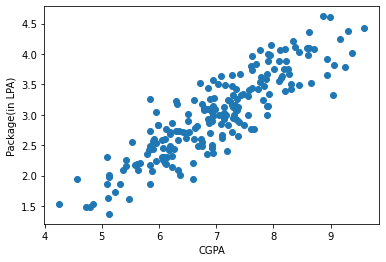

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

# Step 2: Fitting Simple Linear Regression Model to the training set

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
#to train data we use fit
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [11]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

# Step 3: Predicting the Result

In [12]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

array([3.09324469])

Text(0, 0.5, 'Package(in LPA)')

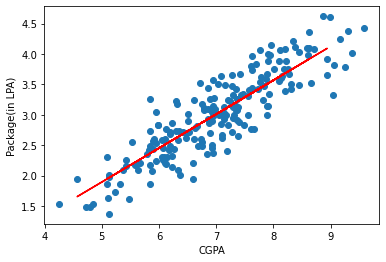

In [13]:
# insight of how the line looks which our LR model found
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_test, lr.predict(X_test), color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')

In [14]:
y_pred = lr.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [15]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

# Step 4: Effeciency of our Regression Model

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
print("MAE", mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [18]:
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [19]:
#R2 score will tell what percent variance cgpa column has on the output column 

# Step 5 : How close our model predicted : Visualization

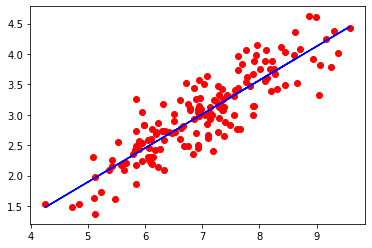

In [20]:
#Visualizing train data
plt.scatter(X_train , y_train, color = 'red')
plt.plot(X_train , lr.predict(X_train), color ='blue')

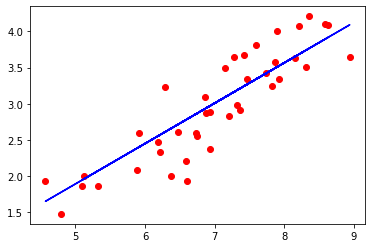

In [21]:
#visualizing test data
plt.scatter(X_test , y_test, color = 'red')
plt.plot(X_test , lr.predict(X_test), color ='blue')